<a href="https://colab.research.google.com/github/gabrielmarques5/praticando_hipoteses_data_science/blob/main/praticando_hipoteses_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
#Importação de Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_1samp
from statsmodels.stats.weightstats import ztest
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon


##Desafio 1

In [ ]:
# Conjunto de dados TechTaste
df_techtaste = pd.DataFrame({'avaliacoes': [38, 44, 33, 42, 47, 33, 36, 39, 42, 36, 39, 34, 42, 42, 36, 43, 31, 35, 36, 41, 42, 30, 25, 38, 47, 36, 32, 45, 44, 45, 37, 48, 37, 36, 44, 49, 31, 45, 45, 40, 36, 50, 38, 34, 36, 42, 46, 49, 36, 34, 38, 31, 53, 40, 57, 40, 36, 42, 26, 50, 32, 43, 35, 37, 42, 30, 36, 43, 40, 43, 44, 52, 37, 51, 35, 47, 40, 50, 37, 49]})

In [ ]:
desvio_padrao = df_techtaste['avaliacoes'].std()
print(f'Desvio padrão: {desvio_padrao:.2f}')

Desvio padrão: 6.42


In [ ]:
erro_padrao = stats.sem(df_techtaste['avaliacoes'])
print(f'Erro padrão: {erro_padrao:.2f}')

Erro padrão: 0.72


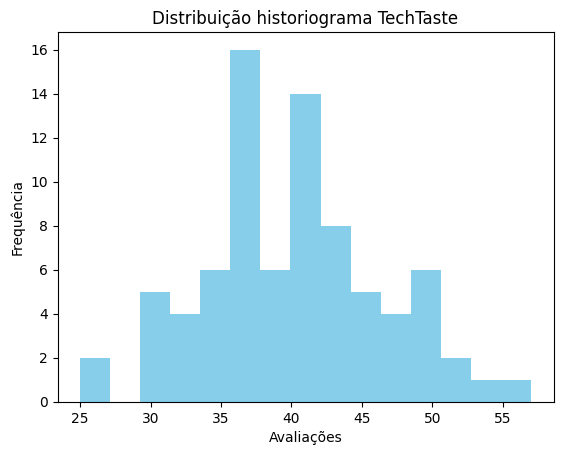

In [ ]:
plt.hist(df_techtaste['avaliacoes'], bins=15, color='skyblue')
plt.title('Distribuição historiograma TechTaste')
plt.xlabel('Avaliações')
plt.ylabel('Frequência')
plt.show()

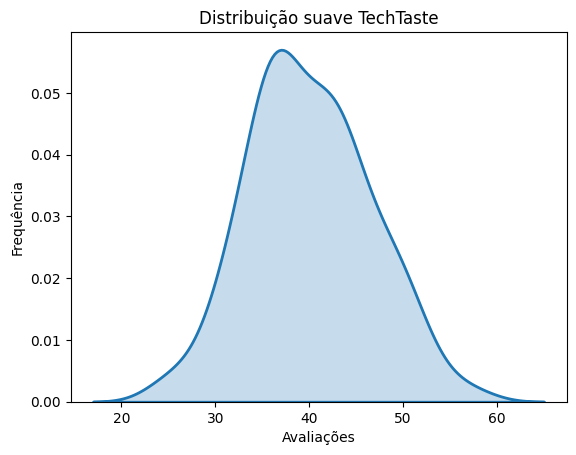

In [ ]:
sns.kdeplot(df_techtaste['avaliacoes'], linewidth=2, fill= True)

plt.xlabel('Avaliações')
plt.ylabel('Frequência')
plt.title('Distribuição suave TechTaste')
plt.show()

In [ ]:
confianca = 0.90
intervalo_confianca = stats.norm.interval(confianca,
                                       loc=df_techtaste['avaliacoes'].mean() ,
                                       scale=erro_padrao)

print(f'Intervalo de Confiança ({confianca*100}%): {intervalo_confianca}')

Intervalo de Confiança (90.0%): (38.84402439920928, 41.205975600790715)


In [ ]:
confianca = 0.95
intervalo_confianca = stats.norm.interval(confianca,
                                       loc=df_techtaste['avaliacoes'].mean() ,
                                       scale=erro_padrao)

print(f'Intervalo de Confiança ({confianca*100}%): {intervalo_confianca}')

Intervalo de Confiança (95.0%): (38.617780776207844, 41.43221922379215)


## Desafio 2

In [ ]:
media_amostral = df_techtaste['avaliacoes'].mean()
print(f'Média Amostral: {media_amostral}')

Média Amostral: 40.025


In [ ]:
'''
H0: u = 30
H1: u != 30
'''

'\nH0: u = 30\nH1: u != 30\n'

In [ ]:
# Valores previamente especificados
confianca = 0.95
desvio_padrao_populacional = 2.65

# Outros valores para calcular o intervalo
tamanho_amostra = len(df_techtaste)
media_nula = 30

intervalo_confianca = stats.norm.interval(confianca,
                                       loc= media_nula,
                                       scale=(desvio_padrao_populacional)/np.sqrt(tamanho_amostra))

print(f'Intervalo de Confiança ({confianca*100}%): {intervalo_confianca}')

Intervalo de Confiança (95.0%): (29.419303816868016, 30.580696183131984)


In [ ]:
stat, p_valor = ztest(x1=df_techtaste['avaliacoes'], value=media_nula, alternative='two-sided')

print(f'Estatística Z: {stat}')
print(f'Valor-p: {p_valor}')

Estatística Z: 13.96274198988354
Valor-p: 2.6311293593122384e-44


In [ ]:
if p_valor < 0.05:
    conclusao = 'Rejeitar a hipótese nula'
else:
    conclusao = 'Não rejeita a hipótese nula'

print('Conclusão:', conclusao)

Conclusão: Rejeitar a hipótese nula


## Desafio 3

In [ ]:
df_techsafe = pd.DataFrame({'porcentagem_compressao': [21.99342831, 20.7234714 , 22.29537708, 24.04605971, 20.53169325, 20.53172609, 24.15842563, 22.53486946, 20.06105123, 22.08512009, 20.07316461, 20.06854049, 21.48392454, 17.17343951, 17.55016433, 19.87542494, 18.97433776, 21.62849467, 19.18395185, 18.1753926, 23.93129754, 20.5484474 , 21.13505641, 18.15050363, 19.91123455]})

In [ ]:
'''
H0: u = 20
H1: u > 20
'''

'\nH0: u = 20\nH1: u > 20\n'

In [ ]:
media_amostral = np.mean(df_techsafe)

In [ ]:
media_amostral

20.6729838832

In [ ]:
nivel_confianca = 0.95
nivel_significancia = 1 - nivel_confianca
print(f'Nivel de significância: {nivel_significancia}')

Nivel de significância: 0.050000000000000044


In [ ]:
stats, p_valor = ttest_1samp(df_techsafe, 20, alternative='greater')

print(stats, p_valor)

[1.75887757] [0.045672]


In [ ]:
if p_valor < nivel_significancia:
    decisao = 'Rejeitar a hipótese nula'
else:
    decisao = 'Não rejeitar a hipótese nula'

print(f'Decisão: {decisao}')

Decisão: Rejeitar a hipótese nula


## Desafio 4

### Caso 1

In [ ]:
df_equipe_vendas = pd.DataFrame({'Vendedor': [ 'Luíza', 'Bia', 'Rodrigo', 'Allan', 'Evaldo'],
                                 'Vendas Antes (R$)': [252.72, 203.91, 307.32, 185.78, 220.5],
                                 'Vendas Depois (R$)': [285.1, 223.15, 324.41, 202.23, 240.63]})

In [ ]:
from scipy.stats import ttest_rel

stat, p_valor = ttest_rel(df_equipe_vendas['Vendas Depois (R$)'], df_equipe_vendas['Vendas Antes (R$)'])
print(f'Estatística do teste t pareado: {stat}')
print(f'Valor-p: {p_valor}')

Estatística do teste t pareado: 7.23705258430516
Valor-p: 0.0019344230773580572


In [ ]:
alpha = 0.05
if p_valor < alpha:
    print("Rejeitar a hipótese nula")
else:
    print("Não rejeitar a hipótese nula")

Rejeitar a hipótese nula


###Caso 2

In [ ]:
df_filiais = pd.DataFrame({'Filial Centro-Norte': [3.2, 2.9, 2.0, 3.3, 3.1],
                           'Filial Sul': [3.8, 4.0, 4.7, 4.9, 4.8]})

In [ ]:
# média com
print(np.mean(df_filiais['Filial Centro-Norte']))
# média sem
print(np.mean(df_filiais['Filial Sul']))

2.8999999999999995
4.4399999999999995


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
stats, p_valor = ttest_ind(df_filiais['Filial Centro-Norte'], df_filiais['Filial Sul'])
print(f'Estatística do teste t independente: {stat}')
print(f'Valor-p: {p_valor}')

Estatística do teste t independente: 7.23705258430516
Valor-p: 0.001465798816319686


In [ ]:
alpha = 0.05
if p_valor < alpha:
    print("Rejeitar a hipótese nula")
else:
    print("Não rejeitar a hipótese nula")

Rejeitar a hipótese nula


## Desafio 5

In [113]:
df_avaliacoes = pd.DataFrame({
    'playcatch': [4, 5, 3, 4, 5, 4, 4, 3, 5, 4, 5, 3, 4],
    'concorrente': [3, 4, 3, 3, 2, 4, 3, 2, 3, 3, 4, 2, 3]
})
df_avaliacoes

,playcatch,concorrente
0,4,3
1,5,4
2,3,3
3,4,3
4,5,2
5,4,4
6,4,3
7,3,2
8,5,3
9,4,3


In [118]:
stats, p_valor = mannwhitneyu(df_avaliacoes['playcatch'], df_avaliacoes['concorrente'])

print(f'Estatística do teste U: {stats}')
print(f'Valor-p: {p_valor}')

Estatística do teste U: 140.5
Valor-p: 0.0026661275820288304


In [119]:
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    conclusao = 'Rejeitar a hipótese nula'
else:
    conclusao = 'Não rejeitar a hipótese nula'

print('Conclusão:', conclusao)

Conclusão: Rejeitar a hipótese nula


In [120]:
df_wt = pd.DataFrame({
    'Antes_WatchTogether': [3, 4, 3, 4, 2, 4, 3, 2, 3, 3, 4, 2, 3],
    'Depois_WatchTogether': [4, 5, 3, 4, 5, 4, 4, 3, 5, 4, 5, 3, 4]
})

df_wt

,Antes_WatchTogether,Depois_WatchTogether
0,3,4
1,4,5
2,3,3
3,4,4
4,2,5
5,4,4
6,3,4
7,2,3
8,3,5
9,3,4


In [122]:
stat, p_valor = wilcoxon(df_wt['Depois_WatchTogether'] - df_wt['Antes_WatchTogether'])

print(f'Estatística do teste de Wilcoxon: {stat}')
print(f'Valor-p: {p_valor}')

Estatística do teste de Wilcoxon: 0.0
Valor-p: 0.0029807046202068393


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [123]:
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    conclusao = 'Rejeitar a hipótese nula'
else:
    conclusao = 'Não rejeitar a hipótese nula'

print('Conclusão:', conclusao)

Conclusão: Rejeitar a hipótese nula
